In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
First download the dataset from: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [4]:
data = pd.read_csv("pima-indians-diabetes.csv")
data.head()

,Pregnancies,Glocuse,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glocuse                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glocuse,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isna().sum()

Pregnancies                 0
Glocuse                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

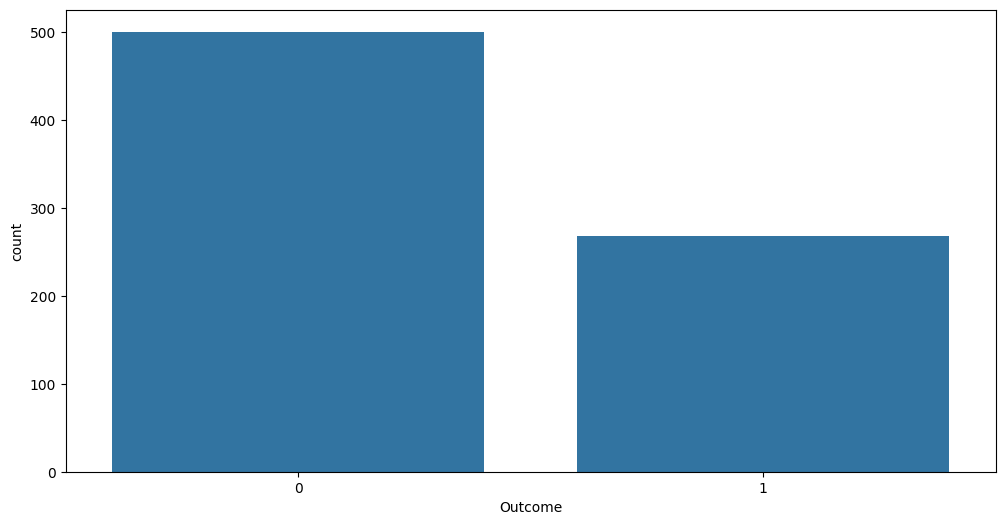

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Outcome', data=data)
plt.show()

In [10]:
data.columns

Index(['Pregnancies', 'Glocuse', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

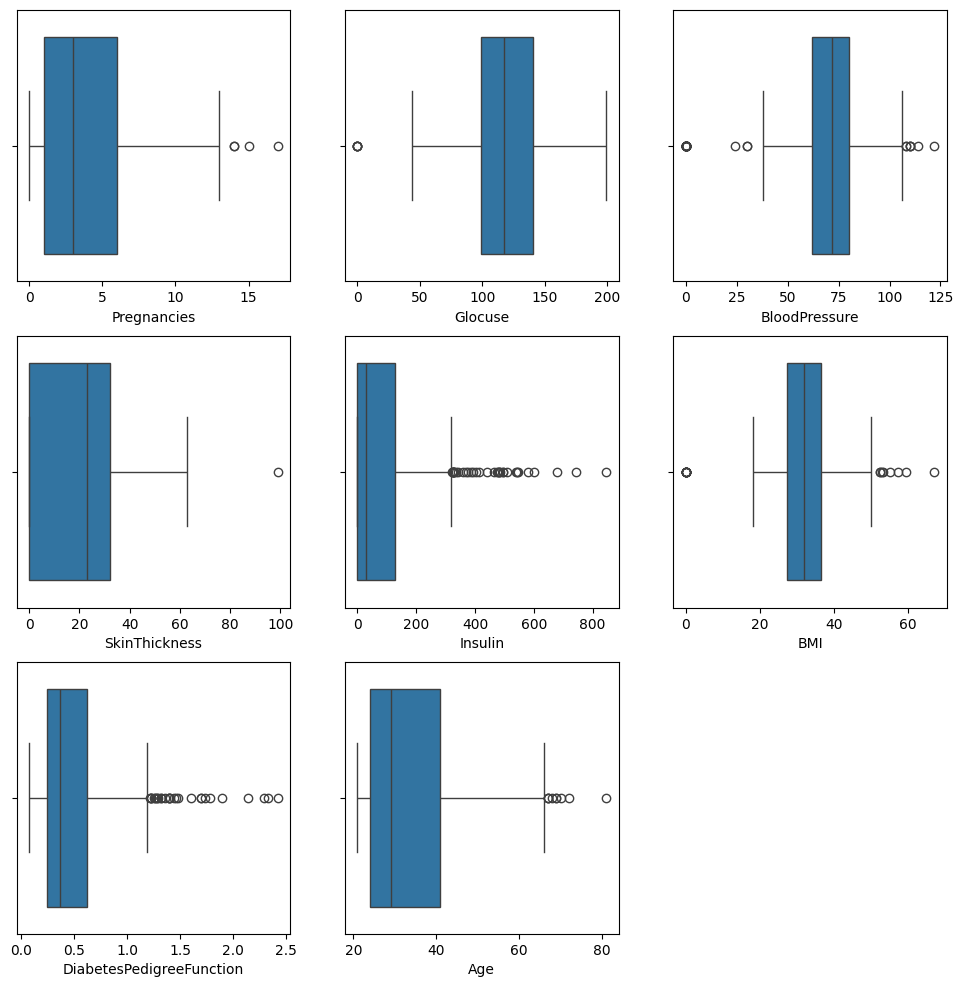

In [13]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(['Pregnancies', 'Glocuse', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, data=data)
plt.show()

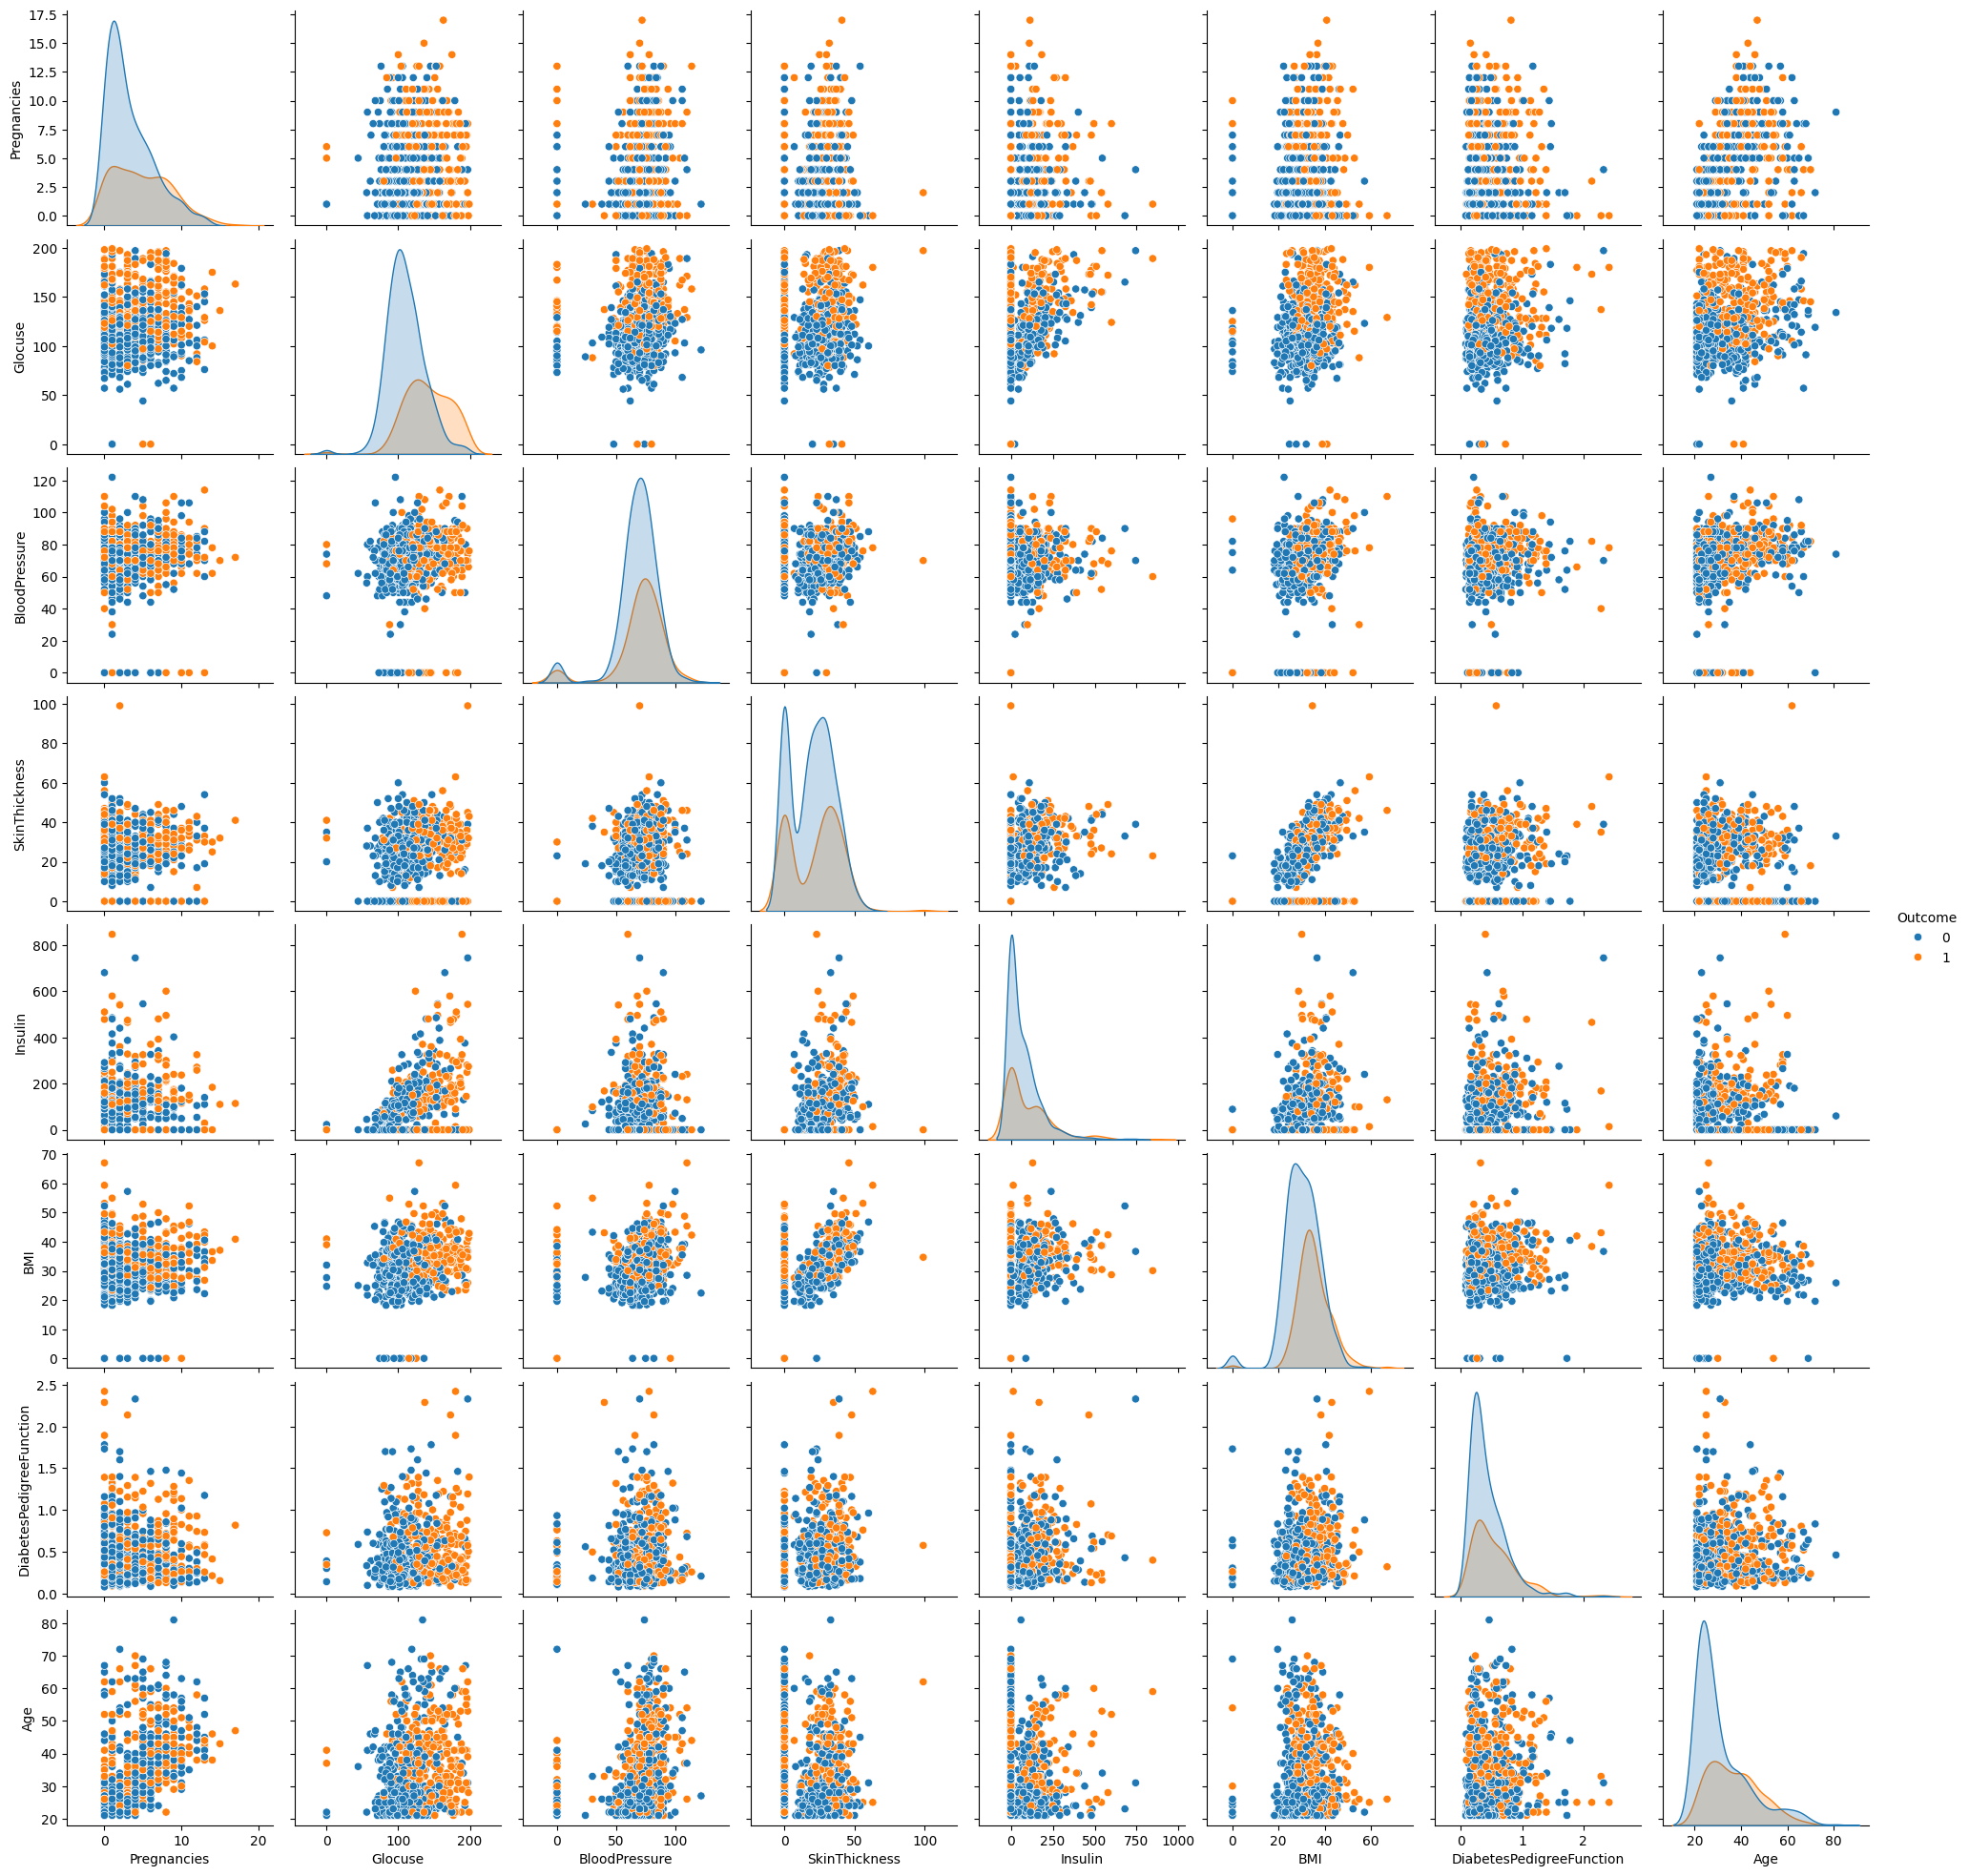

In [15]:
sns.pairplot(hue='Outcome', data=data)
plt.show()

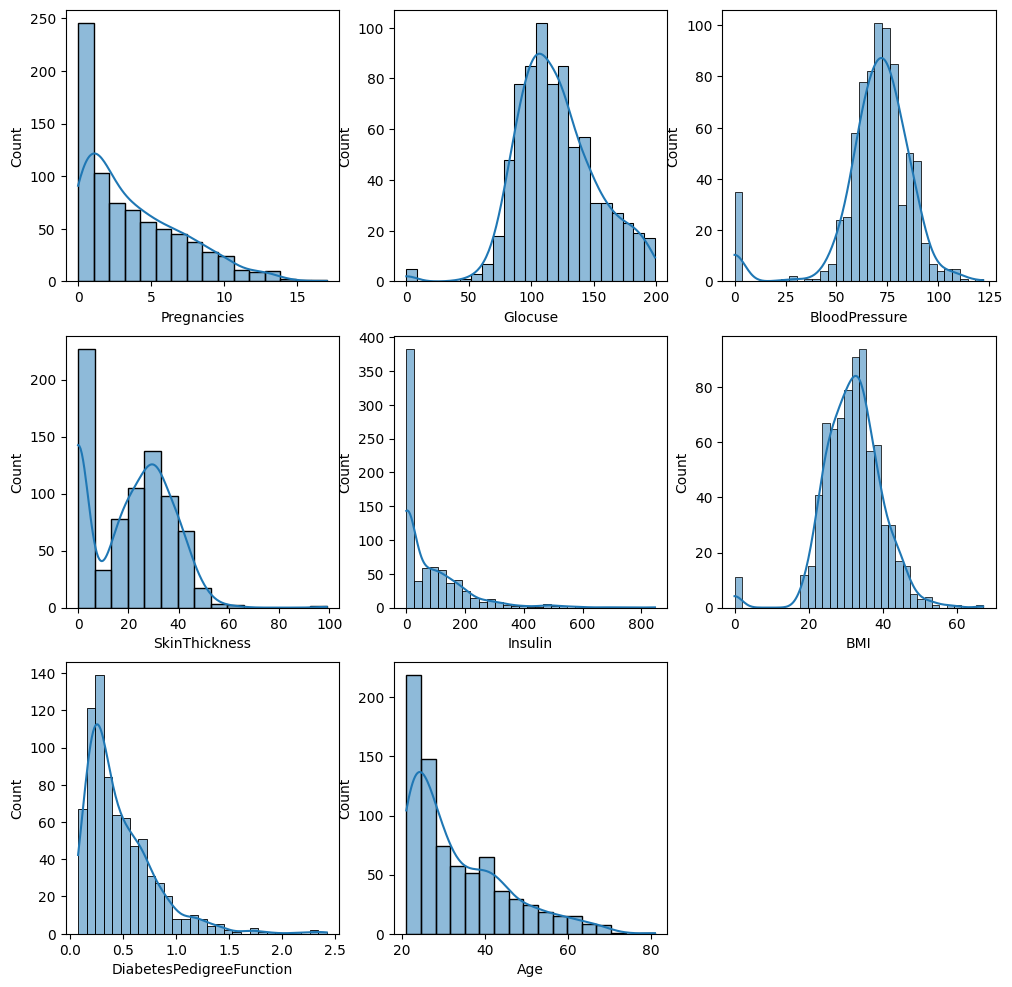

In [16]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(['Pregnancies', 'Glocuse', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=col, data=data, kde=True)
plt.show()

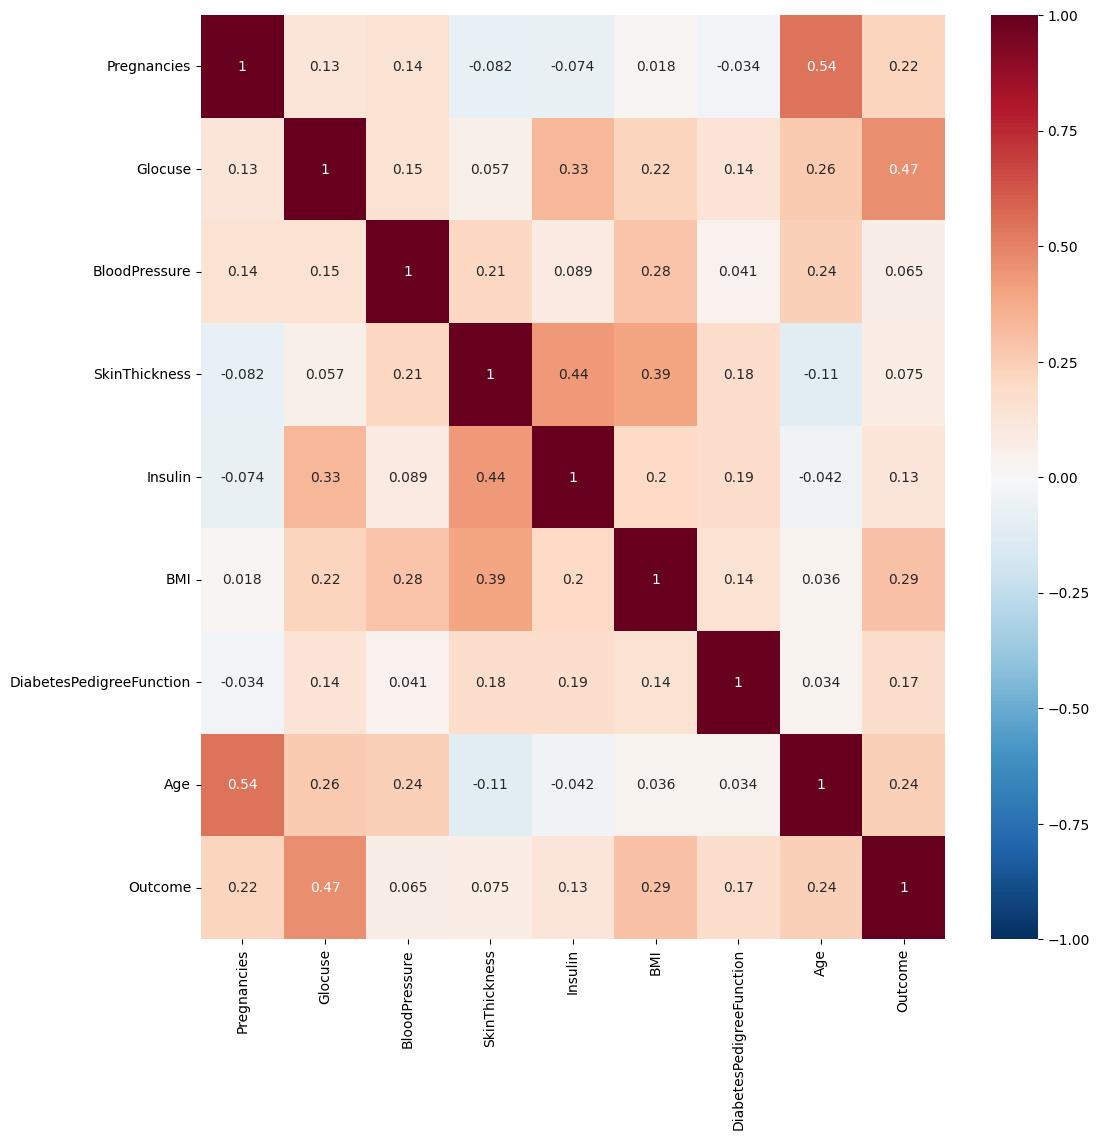

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap( vmin= -1.0, center=0, cmap='RdBu_r', annot=True, data=data.corr())
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(data.drop(['Outcome'], axis=1),), columns=['Pregnancies', 'Glocuse', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [22]:
X.head()

,Pregnancies,Glocuse,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [23]:
y = data['Outcome']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [29]:
max_train = 0
max_index_train = 0
for i in range(len(train_scores)):
    if train_scores[i] > max_train:
        max_train = train_scores[i]
        max_index_train = i
print(max_index_train + 1, max_train)

1 1.0


In [30]:
max_test = 0
max_index_test = 0
for i in range(len(test_scores)):
    if test_scores[i] > max_test:
        max_test = test_scores[i]
        max_index_test = i
print(max_index_test + 1, max_test)

13 0.7792207792207793


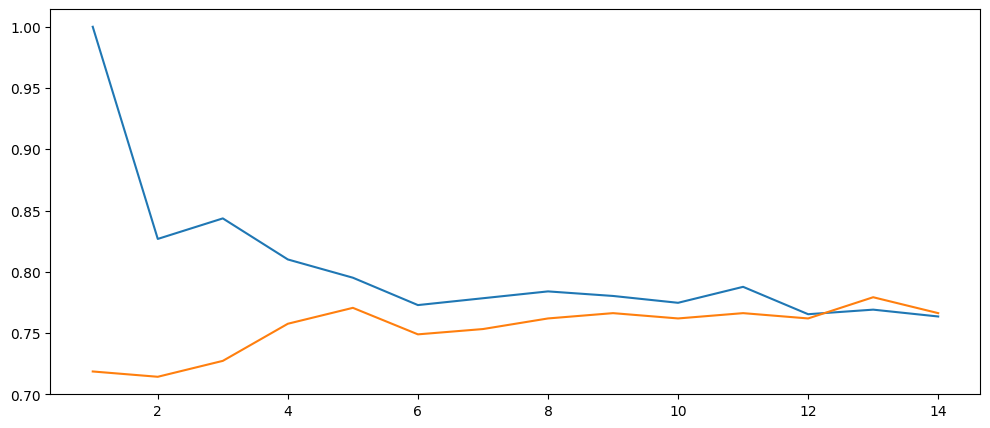

In [37]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, markers='*')
p = sns.lineplot(x=range(1, 15), y=test_scores, markers='o')

In [38]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7792207792207793

In [39]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[141,  16],
       [ 35,  39]])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

